In [1]:
import pandas as pd
import numpy as np
import ffn 
import seaborn as sns
from datetime import datetime as dt
import matplotlib as mpl

In [2]:
%matplotlib inline

sns.set_style("whitegrid")
cm = sns.color_palette("vlag", as_cmap=True)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.4f}'.format

mpl.rcParams.update({
                     'text.color' : "white",
                     'lines.linewidth': 3,
                     'font.size': 16.0,
                     'legend.facecolor': "182742",
                     'legend.edgecolor': 'CFB023',
                     'legend.fancybox': True,
                     'legend.framealpha': 1.,
                     'legend.loc': 'right',
                     'xtick.color': 'white',
                     'ytick.color': 'white',
                     'ytick.minor.visible': True,
                     'axes.facecolor': '#182742',
                     'axes.edgecolor': 'white',
#                      'axes.grid.axis': 'y',
#                      'axes.grid.which': 'minor',
                     'axes.labelcolor' : "white",
                     'axes.labelsize': "24",
                     'axes.labelweight': "bold",
                     'axes.titlesize': 28,
                     'axes.titleweight': 'bold',
                     'axes.titlepad': 20,
                     'figure.facecolor': '#182742',
#                      'xtick.bottom': False,
                    }
                   )

# def colormap(s):
#     if s.dtype == np.object:
#         is_neg = [False for _ in range(s.shape[0])]
#     else:
#         is_neg = s < 0
#     return ['background: red; color:white' 
#             if cell else 'background:green; color:white' 
#             for cell in is_neg]

In [3]:
FOA_START_DATE = dt.fromisoformat('2019-11-19')
FOA_END_DATE = dt.fromisoformat('2022-04-30')
FUND_START_DATE = dt.fromisoformat('2022-05-01')
FUND_END_DATE = dt.fromisoformat('2022-11-30')

In [4]:
FOA_SAMPLE_RANGE = pd.date_range(FOA_START_DATE, FOA_END_DATE)
FUND_SAMPLE_RANGE = pd.date_range(FUND_START_DATE, FUND_END_DATE)
(FOA_SAMPLE_RANGE, FUND_SAMPLE_RANGE)

(DatetimeIndex(['2019-11-19', '2019-11-20', '2019-11-21', '2019-11-22',
                '2019-11-23', '2019-11-24', '2019-11-25', '2019-11-26',
                '2019-11-27', '2019-11-28',
                ...
                '2022-04-21', '2022-04-22', '2022-04-23', '2022-04-24',
                '2022-04-25', '2022-04-26', '2022-04-27', '2022-04-28',
                '2022-04-29', '2022-04-30'],
               dtype='datetime64[ns]', length=894, freq='D'),
 DatetimeIndex(['2022-05-01', '2022-05-02', '2022-05-03', '2022-05-04',
                '2022-05-05', '2022-05-06', '2022-05-07', '2022-05-08',
                '2022-05-09', '2022-05-10',
                ...
                '2022-11-21', '2022-11-22', '2022-11-23', '2022-11-24',
                '2022-11-25', '2022-11-26', '2022-11-27', '2022-11-28',
                '2022-11-29', '2022-11-30'],
               dtype='datetime64[ns]', length=214, freq='D'))

# Load Data

In [5]:
DATAFILE = 'truecode-performance-20221130.csv'
data = ffn.get(['Strategy', 'Bitcoin'], provider=ffn.data.csv, path=DATAFILE)
data

,strategy,bitcoin
Date,,
2019-12-19,"10,000.0000","10,000.0000"
2019-12-20,"10,036.1900","10,052.4900"
2019-12-21,"9,981.8100","9,975.4600"
2019-12-22,"10,342.4300","10,491.0800"
2019-12-23,"10,163.9500","10,233.2600"
2019-12-24,"10,103.7700","10,147.5000"
2019-12-25,"10,053.3600","10,075.9800"
2019-12-26,"10,050.2400","10,072.3000"
2019-12-27,"10,101.2100","10,146.0600"


# Fund Drawdown Analysis

,strategy,bitcoin
Date,,
2022-05-01,0.0000,0.0000
2022-05-02,-0.0001,0.0000
2022-05-03,-0.0002,0.0000
2022-05-04,-0.0003,-0.0207
2022-05-05,-0.0004,0.0000
2022-05-06,-0.0005,-0.0790
2022-05-07,-0.0006,-0.0926
2022-05-08,-0.0007,-0.1063
2022-05-09,-0.0008,-0.1424


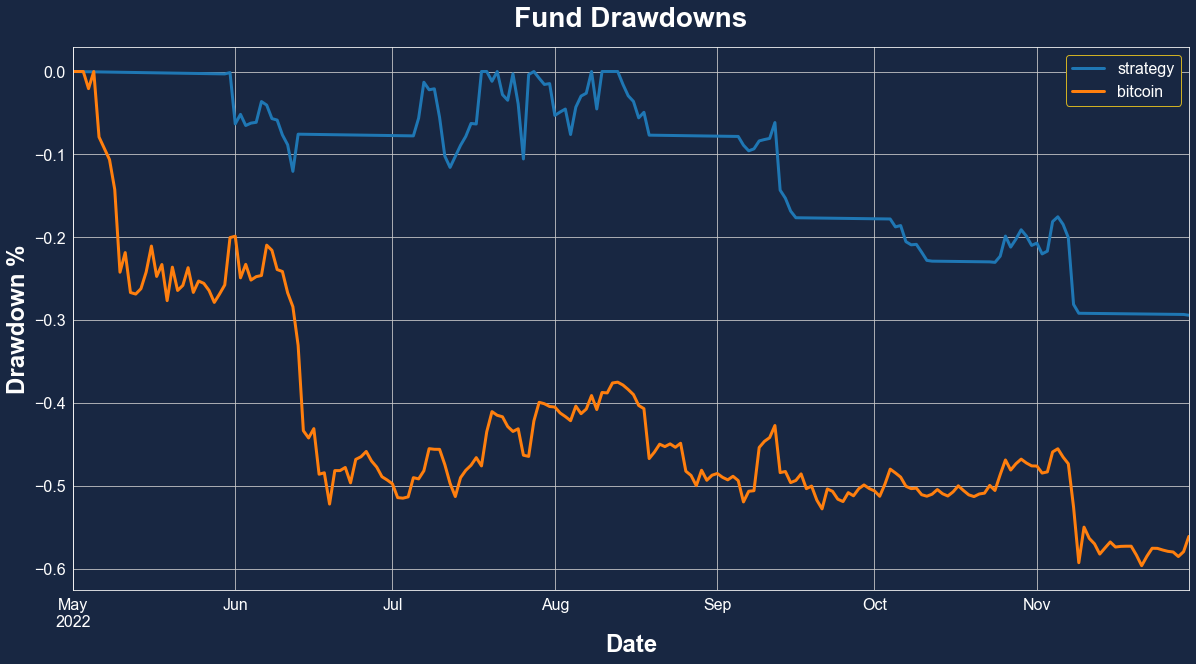

In [6]:
sample = data[FUND_START_DATE:FUND_END_DATE]
sample = ffn.rebase(sample, value=10000)
drawdowns = sample.to_drawdown_series()
ax = drawdowns.plot(figsize=(20, 10), ylabel='Drawdown %', title='Fund Drawdowns')
fig = ax.get_figure()
fig.savefig('fund_drawdowns.pdf')
drawdowns.to_csv('fund_drawdowns.csv')
drawdowns

# Full History Account Drawdowns

,strategy,bitcoin
Date,,
2019-12-19,0.0000,0.0000
2019-12-20,0.0000,0.0000
2019-12-21,-0.0054,-0.0077
2019-12-22,0.0000,0.0000
2019-12-23,-0.0173,-0.0246
2019-12-24,-0.0231,-0.0327
2019-12-25,-0.0279,-0.0396
2019-12-26,-0.0283,-0.0399
2019-12-27,-0.0233,-0.0329


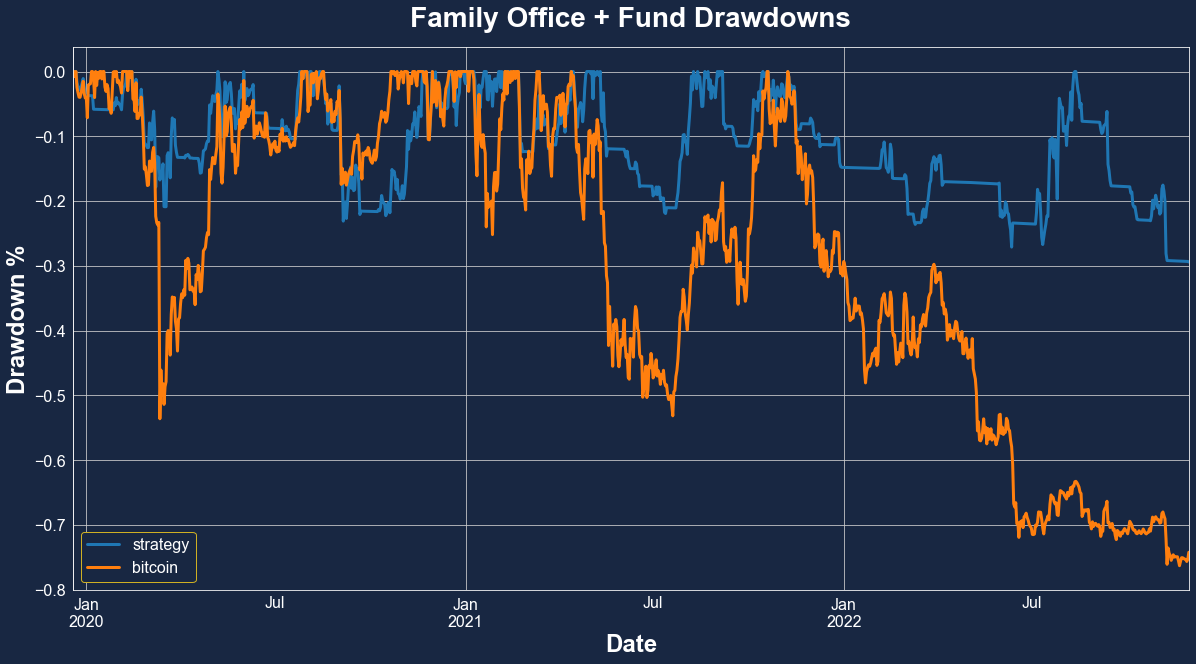

In [7]:
sample = data[FOA_START_DATE:FUND_END_DATE]
sample = ffn.rebase(sample, value=10000)
drawdowns = sample.to_drawdown_series()
ax = drawdowns.plot(figsize=(20, 10), ylabel='Drawdown %', title='Family Office + Fund Drawdowns')
fig = ax.get_figure()
fig.savefig('foa_drawdowns.pdf')
drawdowns.to_csv('foa_drawdowns.csv')
drawdowns

# Fund Daily Simulation

In [8]:
return_data = []
for d in FUND_SAMPLE_RANGE:
    print("Simulating {}".format(d))
    sample = data[d:FUND_END_DATE]
    sample_rebase = ffn.rebase(sample, value=10000)
    stats = sample_rebase.calc_stats()
    return_data.append((d, stats['bitcoin'].stats['total_return'],stats['bitcoin'].stats['max_drawdown'], stats['strategy'].stats['total_return'], stats['strategy'].stats['max_drawdown']))
    


Simulating 2022-05-01 00:00:00
Simulating 2022-05-02 00:00:00
Simulating 2022-05-03 00:00:00
Simulating 2022-05-04 00:00:00
Simulating 2022-05-05 00:00:00
Simulating 2022-05-06 00:00:00
Simulating 2022-05-07 00:00:00
Simulating 2022-05-08 00:00:00
Simulating 2022-05-09 00:00:00
Simulating 2022-05-10 00:00:00
Simulating 2022-05-11 00:00:00
Simulating 2022-05-12 00:00:00
Simulating 2022-05-13 00:00:00
Simulating 2022-05-14 00:00:00
Simulating 2022-05-15 00:00:00
Simulating 2022-05-16 00:00:00
Simulating 2022-05-17 00:00:00
Simulating 2022-05-18 00:00:00
Simulating 2022-05-19 00:00:00
Simulating 2022-05-20 00:00:00
Simulating 2022-05-21 00:00:00
Simulating 2022-05-22 00:00:00
Simulating 2022-05-23 00:00:00
Simulating 2022-05-24 00:00:00
Simulating 2022-05-25 00:00:00
Simulating 2022-05-26 00:00:00
Simulating 2022-05-27 00:00:00
Simulating 2022-05-28 00:00:00
Simulating 2022-05-29 00:00:00
Simulating 2022-05-30 00:00:00
Simulating 2022-05-31 00:00:00
Simulating 2022-06-01 00:00:00
Simulati

/Users/jmp/.pyenv/versions/3.8-dev/envs/truecode_metrics/lib/python3.8/site-packages/ffn/core.py:2299: RuntimeWarning: divide by zero encountered in divide
  res = np.divide(er.mean(), std)
/Users/jmp/.pyenv/versions/3.8-dev/envs/truecode_metrics/lib/python3.8/site-packages/ffn/core.py:258: RuntimeWarning: divide by zero encountered in divide
  self.calmar = np.divide(self.cagr, np.abs(self.max_drawdown))
/Users/jmp/.pyenv/versions/3.8-dev/envs/truecode_metrics/lib/python3.8/site-packages/ffn/core.py:258: RuntimeWarning: divide by zero encountered in divide
  self.calmar = np.divide(self.cagr, np.abs(self.max_drawdown))


In [9]:
df = pd.DataFrame(return_data, index=FUND_SAMPLE_RANGE, columns=('date', 'Bitcoin Return', 'Bitcoin Max Drawdown', 'Strategy Return', 'Strategy Max Drawdown'))
df['Strategy Return Wins'] = df['Strategy Return'] >= df['Bitcoin Return']
df['Strategy Drawdown Wins'] = df['Strategy Max Drawdown'] > df['Bitcoin Max Drawdown']
df.to_csv('fund_daily_simulation.csv')
df

,date,Bitcoin Return,Bitcoin Max Drawdown,Strategy Return,Strategy Max Drawdown,Strategy Return Wins,Strategy Drawdown Wins
2022-05-01,2022-05-01,-0.5370,-0.5964,-0.1269,-0.2941,True,True
2022-05-02,2022-05-02,-0.5471,-0.5964,-0.1268,-0.2941,True,True
2022-05-03,2022-05-03,-0.5478,-0.5964,-0.1267,-0.2941,True,True
2022-05-04,2022-05-04,-0.5382,-0.5964,-0.1267,-0.2941,True,True
2022-05-05,2022-05-05,-0.5610,-0.5964,-0.1266,-0.2941,True,True
2022-05-06,2022-05-06,-0.5234,-0.5618,-0.1265,-0.2941,True,True
2022-05-07,2022-05-07,-0.5162,-0.5552,-0.1264,-0.2941,True,True
2022-05-08,2022-05-08,-0.5088,-0.5484,-0.1263,-0.2941,True,True
2022-05-09,2022-05-09,-0.4882,-0.5294,-0.1262,-0.2941,True,True
2022-05-10,2022-05-10,-0.4207,-0.4963,-0.1261,-0.2941,True,True


# Full History Simulation

In [10]:
return_data = []
for d in FOA_SAMPLE_RANGE:
    print("Simulating {}".format(d))
    sample = data[d:FUND_END_DATE]
    sample_rebase = ffn.rebase(sample, value=10000)
    stats = sample_rebase.calc_stats()
    return_data.append((d, stats['bitcoin'].stats['total_return'],stats['bitcoin'].stats['max_drawdown'], stats['strategy'].stats['total_return'], stats['strategy'].stats['max_drawdown']))
    


Simulating 2019-11-19 00:00:00
Simulating 2019-11-20 00:00:00
Simulating 2019-11-21 00:00:00
Simulating 2019-11-22 00:00:00
Simulating 2019-11-23 00:00:00
Simulating 2019-11-24 00:00:00
Simulating 2019-11-25 00:00:00
Simulating 2019-11-26 00:00:00
Simulating 2019-11-27 00:00:00
Simulating 2019-11-28 00:00:00
Simulating 2019-11-29 00:00:00
Simulating 2019-11-30 00:00:00
Simulating 2019-12-01 00:00:00
Simulating 2019-12-02 00:00:00
Simulating 2019-12-03 00:00:00
Simulating 2019-12-04 00:00:00
Simulating 2019-12-05 00:00:00
Simulating 2019-12-06 00:00:00
Simulating 2019-12-07 00:00:00
Simulating 2019-12-08 00:00:00
Simulating 2019-12-09 00:00:00
Simulating 2019-12-10 00:00:00
Simulating 2019-12-11 00:00:00
Simulating 2019-12-12 00:00:00
Simulating 2019-12-13 00:00:00
Simulating 2019-12-14 00:00:00
Simulating 2019-12-15 00:00:00
Simulating 2019-12-16 00:00:00
Simulating 2019-12-17 00:00:00
Simulating 2019-12-18 00:00:00
Simulating 2019-12-19 00:00:00
Simulating 2019-12-20 00:00:00
Simulati

Simulating 2020-08-11 00:00:00
Simulating 2020-08-12 00:00:00
Simulating 2020-08-13 00:00:00
Simulating 2020-08-14 00:00:00
Simulating 2020-08-15 00:00:00
Simulating 2020-08-16 00:00:00
Simulating 2020-08-17 00:00:00
Simulating 2020-08-18 00:00:00
Simulating 2020-08-19 00:00:00
Simulating 2020-08-20 00:00:00
Simulating 2020-08-21 00:00:00
Simulating 2020-08-22 00:00:00
Simulating 2020-08-23 00:00:00
Simulating 2020-08-24 00:00:00
Simulating 2020-08-25 00:00:00
Simulating 2020-08-26 00:00:00
Simulating 2020-08-27 00:00:00
Simulating 2020-08-28 00:00:00
Simulating 2020-08-29 00:00:00
Simulating 2020-08-30 00:00:00
Simulating 2020-08-31 00:00:00
Simulating 2020-09-01 00:00:00
Simulating 2020-09-02 00:00:00
Simulating 2020-09-03 00:00:00
Simulating 2020-09-04 00:00:00
Simulating 2020-09-05 00:00:00
Simulating 2020-09-06 00:00:00
Simulating 2020-09-07 00:00:00
Simulating 2020-09-08 00:00:00
Simulating 2020-09-09 00:00:00
Simulating 2020-09-10 00:00:00
Simulating 2020-09-11 00:00:00
Simulati

Simulating 2021-05-10 00:00:00
Simulating 2021-05-11 00:00:00
Simulating 2021-05-12 00:00:00
Simulating 2021-05-13 00:00:00
Simulating 2021-05-14 00:00:00
Simulating 2021-05-15 00:00:00
Simulating 2021-05-16 00:00:00
Simulating 2021-05-17 00:00:00
Simulating 2021-05-18 00:00:00
Simulating 2021-05-19 00:00:00
Simulating 2021-05-20 00:00:00
Simulating 2021-05-21 00:00:00
Simulating 2021-05-22 00:00:00
Simulating 2021-05-23 00:00:00
Simulating 2021-05-24 00:00:00
Simulating 2021-05-25 00:00:00
Simulating 2021-05-26 00:00:00
Simulating 2021-05-27 00:00:00
Simulating 2021-05-28 00:00:00
Simulating 2021-05-29 00:00:00
Simulating 2021-05-30 00:00:00
Simulating 2021-05-31 00:00:00
Simulating 2021-06-01 00:00:00
Simulating 2021-06-02 00:00:00
Simulating 2021-06-03 00:00:00
Simulating 2021-06-04 00:00:00
Simulating 2021-06-05 00:00:00
Simulating 2021-06-06 00:00:00
Simulating 2021-06-07 00:00:00
Simulating 2021-06-08 00:00:00
Simulating 2021-06-09 00:00:00
Simulating 2021-06-10 00:00:00
Simulati

Simulating 2022-02-04 00:00:00
Simulating 2022-02-05 00:00:00
Simulating 2022-02-06 00:00:00
Simulating 2022-02-07 00:00:00
Simulating 2022-02-08 00:00:00
Simulating 2022-02-09 00:00:00
Simulating 2022-02-10 00:00:00
Simulating 2022-02-11 00:00:00
Simulating 2022-02-12 00:00:00
Simulating 2022-02-13 00:00:00
Simulating 2022-02-14 00:00:00
Simulating 2022-02-15 00:00:00
Simulating 2022-02-16 00:00:00
Simulating 2022-02-17 00:00:00
Simulating 2022-02-18 00:00:00
Simulating 2022-02-19 00:00:00
Simulating 2022-02-20 00:00:00
Simulating 2022-02-21 00:00:00
Simulating 2022-02-22 00:00:00
Simulating 2022-02-23 00:00:00
Simulating 2022-02-24 00:00:00
Simulating 2022-02-25 00:00:00
Simulating 2022-02-26 00:00:00
Simulating 2022-02-27 00:00:00
Simulating 2022-02-28 00:00:00
Simulating 2022-03-01 00:00:00
Simulating 2022-03-02 00:00:00
Simulating 2022-03-03 00:00:00
Simulating 2022-03-04 00:00:00
Simulating 2022-03-05 00:00:00
Simulating 2022-03-06 00:00:00
Simulating 2022-03-07 00:00:00
Simulati

In [11]:
df = pd.DataFrame(return_data, index=FOA_SAMPLE_RANGE, columns=('date', 'Bitcoin Return', 'Bitcoin Max Drawdown', 'Strategy Return', 'Strategy Max Drawdown'))
df['Strategy Return Wins'] = df['Strategy Return'] >= df['Bitcoin Return']
df['Strategy Drawdown Wins'] = df['Strategy Max Drawdown'] > df['Bitcoin Max Drawdown']
df.to_csv('foa_daily_simulation.csv')
cm = sns.color_palette("blend:white,palegreen", as_cmap=True)
df[['Bitcoin Return', 'Strategy Return']].style.background_gradient(cmap = cm,axis=None)


,Bitcoin Return,Strategy Return
2019-11-19 00:00:00,1.436612,3.273278
2019-11-20 00:00:00,1.436612,3.273278
2019-11-21 00:00:00,1.436612,3.273278
2019-11-22 00:00:00,1.436612,3.273278
2019-11-23 00:00:00,1.436612,3.273278
2019-11-24 00:00:00,1.436612,3.273278
2019-11-25 00:00:00,1.436612,3.273278
2019-11-26 00:00:00,1.436612,3.273278
2019-11-27 00:00:00,1.436612,3.273278
2019-11-28 00:00:00,1.436612,3.273278


In [12]:
cm = sns.color_palette("blend:lightsalmon,white", as_cmap=True)
df[['Bitcoin Max Drawdown', 'Strategy Max Drawdown']].style.background_gradient(cmap = cm,axis=None)


,Bitcoin Max Drawdown,Strategy Max Drawdown
2019-11-19 00:00:00,-0.762768,-0.294103
2019-11-20 00:00:00,-0.762768,-0.294103
2019-11-21 00:00:00,-0.762768,-0.294103
2019-11-22 00:00:00,-0.762768,-0.294103
2019-11-23 00:00:00,-0.762768,-0.294103
2019-11-24 00:00:00,-0.762768,-0.294103
2019-11-25 00:00:00,-0.762768,-0.294103
2019-11-26 00:00:00,-0.762768,-0.294103
2019-11-27 00:00:00,-0.762768,-0.294103
2019-11-28 00:00:00,-0.762768,-0.294103
